In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv("/content/movies_youtube_sentiments.csv")

In [3]:
df

,name,trailer_link,video_id,sentiment_scores,favorability,rating,genre,year,released,votes,director,writer,star,country,budget,gross,company,runtime
0,Harry Potter and the Goblet of Fire,https://www.youtube.com/watch?v=3EGojp4Hh6I,3EGojp4Hh6I,"{'positive': 87, 'neutral': 112, 'negative': 51}",0.630435,PG-13,Adventure,2005,"November 18, 2005 (United States)",566000.0,Mike Newell,Steve Kloves,Daniel Radcliffe,United Kingdom,150000000.0,896678241.0,Warner Bros.,157.0
1,The 40-Year-Old Virgin,https://www.youtube.com/watch?v=YnDeJn-BX5Q,YnDeJn-BX5Q,"{'positive': 40, 'neutral': 45, 'negative': 18}",0.689655,R,Comedy,2005,"August 19, 2005 (United States)",407000.0,Judd Apatow,Judd Apatow,Steve Carell,United States,26000000.0,177378645.0,Universal Pictures,116.0
2,Memoirs of a Geisha,https://www.youtube.com/watch?v=4L-xlmakQvc,4L-xlmakQvc,"{'positive': 120, 'neutral': 89, 'negative': 41}",0.745342,PG-13,Drama,2005,"December 23, 2005 (United States)",141000.0,Rob Marshall,Robin Swicord,Ziyi Zhang,France,85000000.0,162242962.0,Columbia Pictures,145.0
3,Pride & Prejudice,https://www.youtube.com/watch?v=Ur_DIHs92NM,Ur_DIHs92NM,"{'positive': 93, 'neutral': 98, 'negative': 19}",0.830357,PG,Drama,2005,"November 23, 2005 (United States)",269000.0,Joe Wright,Deborah Moggach,Keira Knightley,France,28000000.0,121616555.0,Focus Features,129.0
4,Batman Begins,https://www.youtube.com/watch?v=neY2xVmOfUM,neY2xVmOfUM,"{'positive': 128, 'neutral': 97, 'negative': 25}",0.836601,PG-13,Action,2005,"June 15, 2005 (United States)",1300000.0,Christopher Nolan,Bob Kane,Christian Bale,United Kingdom,150000000.0,373661946.0,Warner Bros.,140.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1100,Assassination Nation,https://www.youtube.com/watch?v=d9qyOGEuLY4,d9qyOGEuLY4,"{'positive': 125, 'neutral': 71, 'negative': 54}",0.698324,R,Action,2018,"September 21, 2018 (United States)",17000.0,Sam Levinson,Sam Levinson,Odessa Young,United States,7000000.0,2584988.0,BRON Studios,108.0
1101,Unfriended: Dark Web,https://www.youtube.com/watch?v=XenTM_C9fxM,XenTM_C9fxM,"{'positive': 66, 'neutral': 114, 'negative': 70}",0.485294,R,Horror,2018,"July 20, 2018 (United States)",29000.0,Stephen Susco,Stephen Susco,Colin Woodell,United States,1000000.0,16024987.0,Bazelevs Production,92.0
1102,The Nutcracker and the Four Realms,https://www.youtube.com/watch?v=BXfxLIuNJvw,BXfxLIuNJvw,"{'positive': 118, 'neutral': 87, 'negative': 45}",0.723926,PG,Adventure,2018,"November 2, 2018 (United States)",30000.0,Lasse Hallström,Ashleigh Powell,Mackenzie Foy,United States,120000000.0,173961069.0,Walt Disney Pictures,99.0
1103,Little Italy,https://www.youtube.com/watch?v=I-DMrk3hqEE,I-DMrk3hqEE,"{'positive': 62, 'neutral': 85, 'negative': 41}",0.601942,R,Comedy,2018,"September 21, 2018 (United States)",13000.0,Donald Petrie,Steve Galluccio,Emma Roberts,Canada,NaN,1362536.0,Firsttake Entertainment,102.0


In [4]:
df.columns


Index(['name', 'trailer_link', 'video_id', 'sentiment_scores', 'favorability',
       'rating', 'genre', 'year', 'released', 'votes', 'director', 'writer',
       'star', 'country', 'budget', 'gross', 'company', 'runtime'],
      dtype='object')

In [5]:
df.head(10)


,name,trailer_link,video_id,sentiment_scores,favorability,rating,genre,year,released,votes,director,writer,star,country,budget,gross,company,runtime
0,Harry Potter and the Goblet of Fire,https://www.youtube.com/watch?v=3EGojp4Hh6I,3EGojp4Hh6I,"{'positive': 87, 'neutral': 112, 'negative': 51}",0.630435,PG-13,Adventure,2005,"November 18, 2005 (United States)",566000.0,Mike Newell,Steve Kloves,Daniel Radcliffe,United Kingdom,150000000.0,896678241.0,Warner Bros.,157.0
1,The 40-Year-Old Virgin,https://www.youtube.com/watch?v=YnDeJn-BX5Q,YnDeJn-BX5Q,"{'positive': 40, 'neutral': 45, 'negative': 18}",0.689655,R,Comedy,2005,"August 19, 2005 (United States)",407000.0,Judd Apatow,Judd Apatow,Steve Carell,United States,26000000.0,177378645.0,Universal Pictures,116.0
2,Memoirs of a Geisha,https://www.youtube.com/watch?v=4L-xlmakQvc,4L-xlmakQvc,"{'positive': 120, 'neutral': 89, 'negative': 41}",0.745342,PG-13,Drama,2005,"December 23, 2005 (United States)",141000.0,Rob Marshall,Robin Swicord,Ziyi Zhang,France,85000000.0,162242962.0,Columbia Pictures,145.0
3,Pride & Prejudice,https://www.youtube.com/watch?v=Ur_DIHs92NM,Ur_DIHs92NM,"{'positive': 93, 'neutral': 98, 'negative': 19}",0.830357,PG,Drama,2005,"November 23, 2005 (United States)",269000.0,Joe Wright,Deborah Moggach,Keira Knightley,France,28000000.0,121616555.0,Focus Features,129.0
4,Batman Begins,https://www.youtube.com/watch?v=neY2xVmOfUM,neY2xVmOfUM,"{'positive': 128, 'neutral': 97, 'negative': 25}",0.836601,PG-13,Action,2005,"June 15, 2005 (United States)",1300000.0,Christopher Nolan,Bob Kane,Christian Bale,United Kingdom,150000000.0,373661946.0,Warner Bros.,140.0
5,The Descent,https://www.youtube.com/watch?v=CSYg7Z1KS_I,CSYg7Z1KS_I,"{'positive': 90, 'neutral': 68, 'negative': 92}",0.494505,R,Adventure,2005,"August 4, 2006 (United States)",207000.0,Neil Marshall,Neil Marshall,Shauna Macdonald,United Kingdom,NaN,57130027.0,Celador Films,99.0
6,Brokeback Mountain,https://www.youtube.com/watch?v=kMA30rThECg,kMA30rThECg,"{'positive': 107, 'neutral': 78, 'negative': 65}",0.622093,R,Drama,2005,"January 13, 2006 (United States)",333000.0,Ang Lee,Annie Proulx,Jake Gyllenhaal,United States,14000000.0,178062759.0,Focus Features,134.0
7,Sin City,https://www.youtube.com/watch?v=T2Dj6ktPU5c,T2Dj6ktPU5c,"{'positive': 111, 'neutral': 107, 'negative': 32}",0.776224,R,Crime,2005,"April 1, 2005 (United States)",745000.0,Frank Miller,Frank Miller,Mickey Rourke,United States,40000000.0,158733820.0,Dimension Films,124.0
8,V for Vendetta,https://www.youtube.com/watch?v=IHVzzxrPt1c,IHVzzxrPt1c,"{'positive': 83, 'neutral': 134, 'negative': 34}",0.709402,R,Action,2005,"March 17, 2006 (United States)",1100000.0,James McTeigue,Lilly Wachowski,Hugo Weaving,United States,54000000.0,132511035.0,Warner Bros.,132.0
9,Wedding Crashers,https://www.youtube.com/watch?v=GnD48PD84-8,GnD48PD84-8,"{'positive': 17, 'neutral': 21, 'negative': 10}",0.629630,R,Comedy,2005,"July 15, 2005 (United States)",339000.0,David Dobkin,Steve Faber,Owen Wilson,United States,40000000.0,288467645.0,New Line Cinema,119.0


In [6]:
df.tail(10)


,name,trailer_link,video_id,sentiment_scores,favorability,rating,genre,year,released,votes,director,writer,star,country,budget,gross,company,runtime
1095,The Catcher Was a Spy,https://www.youtube.com/watch?v=W0XTxOs-_Os,W0XTxOs-_Os,"{'positive': 40, 'neutral': 30, 'negative': 15}",0.727273,R,Biography,2018,"June 22, 2018 (United States)",8500.0,Ben Lewin,Robert Rodat,Paul Rudd,United States,14000000.0,953953.0,PalmStar Media,94.0
1096,Welcome to Marwen,https://www.youtube.com/watch?v=W6dy7xQ8NeE,W6dy7xQ8NeE,"{'positive': 112, 'neutral': 71, 'negative': 67}",0.625698,PG-13,Biography,2018,"December 21, 2018 (United States)",21000.0,Robert Zemeckis,Robert Zemeckis,Steve Carell,Japan,39000000.0,13061491.0,Universal Pictures,116.0
1097,Bad Samaritan,https://www.youtube.com/watch?v=2ZiNWzqll04,2ZiNWzqll04,"{'positive': 74, 'neutral': 33, 'negative': 31}",0.704762,R,Crime,2018,"May 4, 2018 (United States)",21000.0,Dean Devlin,Brandon Boyce,David Tennant,United States,NaN,4623836.0,Electric Entertainment,110.0
1098,Border,https://www.youtube.com/watch?v=QMs28A1s1OA,QMs28A1s1OA,"{'positive': 101, 'neutral': 113, 'negative': 36}",0.737226,R,Crime,2018,"October 26, 2018 (United States)",26000.0,Ali Abbasi,John Ajvide Lindqvist,Eva Melander,Sweden,NaN,2177678.0,Meta Film Stockholm,110.0
1099,Gringo,https://www.youtube.com/watch?v=MnKbM9Zxtn8,MnKbM9Zxtn8,"{'positive': 65, 'neutral': 65, 'negative': 38}",0.631068,R,Action,2018,"March 9, 2018 (United States)",28000.0,Nash Edgerton,Anthony Tambakis,Joel Edgerton,Australia,NaN,11001627.0,Amazon Studios,111.0
1100,Assassination Nation,https://www.youtube.com/watch?v=d9qyOGEuLY4,d9qyOGEuLY4,"{'positive': 125, 'neutral': 71, 'negative': 54}",0.698324,R,Action,2018,"September 21, 2018 (United States)",17000.0,Sam Levinson,Sam Levinson,Odessa Young,United States,7000000.0,2584988.0,BRON Studios,108.0
1101,Unfriended: Dark Web,https://www.youtube.com/watch?v=XenTM_C9fxM,XenTM_C9fxM,"{'positive': 66, 'neutral': 114, 'negative': 70}",0.485294,R,Horror,2018,"July 20, 2018 (United States)",29000.0,Stephen Susco,Stephen Susco,Colin Woodell,United States,1000000.0,16024987.0,Bazelevs Production,92.0
1102,The Nutcracker and the Four Realms,https://www.youtube.com/watch?v=BXfxLIuNJvw,BXfxLIuNJvw,"{'positive': 118, 'neutral': 87, 'negative': 45}",0.723926,PG,Adventure,2018,"November 2, 2018 (United States)",30000.0,Lasse Hallström,Ashleigh Powell,Mackenzie Foy,United States,120000000.0,173961069.0,Walt Disney Pictures,99.0
1103,Little Italy,https://www.youtube.com/watch?v=I-DMrk3hqEE,I-DMrk3hqEE,"{'positive': 62, 'neutral': 85, 'negative': 41}",0.601942,R,Comedy,2018,"September 21, 2018 (United States)",13000.0,Donald Petrie,Steve Galluccio,Emma Roberts,Canada,NaN,1362536.0,Firsttake Entertainment,102.0
1104,The Happytime Murders,https://www.youtube.com/watch?v=-eks8LG72uo,-eks8LG72uo,"{'positive': 98, 'neutral': 98, 'negative': 54}",0.644737,R,Action,2018,"August 24, 2018 (United States)",26000.0,Brian Henson,Todd Berger,Melissa McCarthy,United States,40000000.0,27506452.0,STX Entertainment,91.0


In [7]:
df.describe()


,favorability,year,votes,budget,gross,runtime
count,1105.000000,1105.000000,1.105000e+03,9.010000e+02,1.105000e+03,1104.000000
mean,0.679717,2010.043439,1.364592e+05,4.306125e+07,1.060908e+08,109.175725
std,0.132921,6.095252,1.728636e+05,4.692794e+07,1.698105e+08,16.974139
min,0.000000,1980.000000,3.360000e+02,1.500000e+04,1.808000e+03,75.000000
25%,0.610390,2007.000000,3.400000e+04,1.200000e+07,1.060642e+07,96.750000
50%,0.689655,2010.000000,7.300000e+04,2.800000e+07,4.473466e+07,106.000000
75%,0.760000,2014.000000,1.670000e+05,5.500000e+07,1.258562e+08,118.000000
max,1.000000,2019.000000,1.600000e+06,3.000000e+08,1.236005e+09,193.000000


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1105 entries, 0 to 1104
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1105 non-null   object 
 1   trailer_link      1105 non-null   object 
 2   video_id          1105 non-null   object 
 3   sentiment_scores  1105 non-null   object 
 4   favorability      1105 non-null   float64
 5   rating            1104 non-null   object 
 6   genre             1105 non-null   object 
 7   year              1105 non-null   int64  
 8   released          1105 non-null   object 
 9   votes             1105 non-null   float64
 10  director          1105 non-null   object 
 11  writer            1104 non-null   object 
 12  star              1105 non-null   object 
 13  country           1105 non-null   object 
 14  budget            901 non-null    float64
 15  gross             1105 non-null   float64
 16  company           1105 non-null   object 


In [11]:
def plot_hist(variable):
    plt.figure(figsize = (8,4))
    plt.hist(df[variable], bins = 10)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distrubiton with hist".format(variable))
    plt.show()

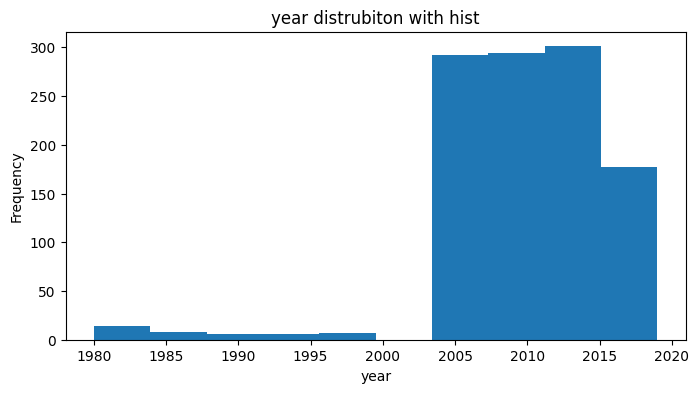

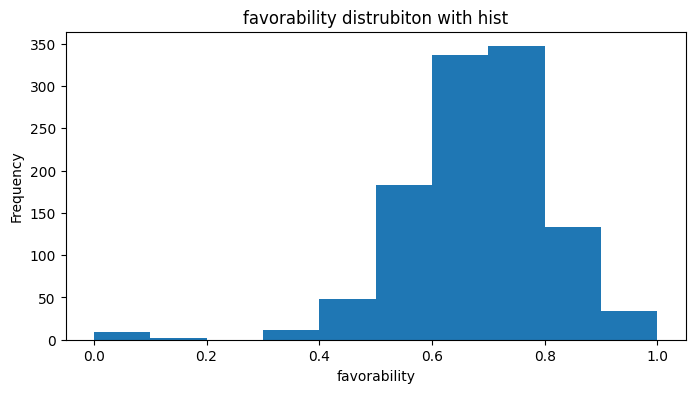

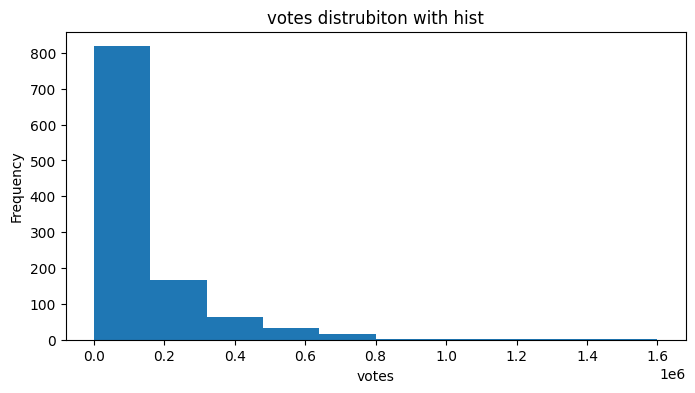

In [12]:

numericVar = ["year", "favorability", "votes"]
for n in numericVar:
    plot_hist(n)

In [13]:
df.columns[df.isnull().any()]


Index(['rating', 'writer', 'budget', 'runtime'], dtype='object')

In [14]:
df.isnull().sum()

name                  0
trailer_link          0
video_id              0
sentiment_scores      0
favorability          0
rating                1
genre                 0
year                  0
released              0
votes                 0
director              0
writer                1
star                  0
country               0
budget              204
gross                 0
company               0
runtime               1
dtype: int64

In [15]:
df.video_id.unique()


array(['3EGojp4Hh6I', 'YnDeJn-BX5Q', '4L-xlmakQvc', ..., 'BXfxLIuNJvw',
       'I-DMrk3hqEE', '-eks8LG72uo'], dtype=object)

In [16]:
df.video_id.unique().size


1054

In [19]:
fig = px.bar(df, x='video_id', y='favorability')
fig.show()

In [23]:
# Country - Cost Per Month Standard ($)
fig = px.pie(df, values='favorability', names='video_id')
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

In [24]:
fig = px.scatter(df, x="favorability", y="video_id")
fig.show()

In [27]:
fig = px.bar(df, x='favorability', y='video_id',
             hover_data=['votes', 'director'],height=2000)
fig.show()

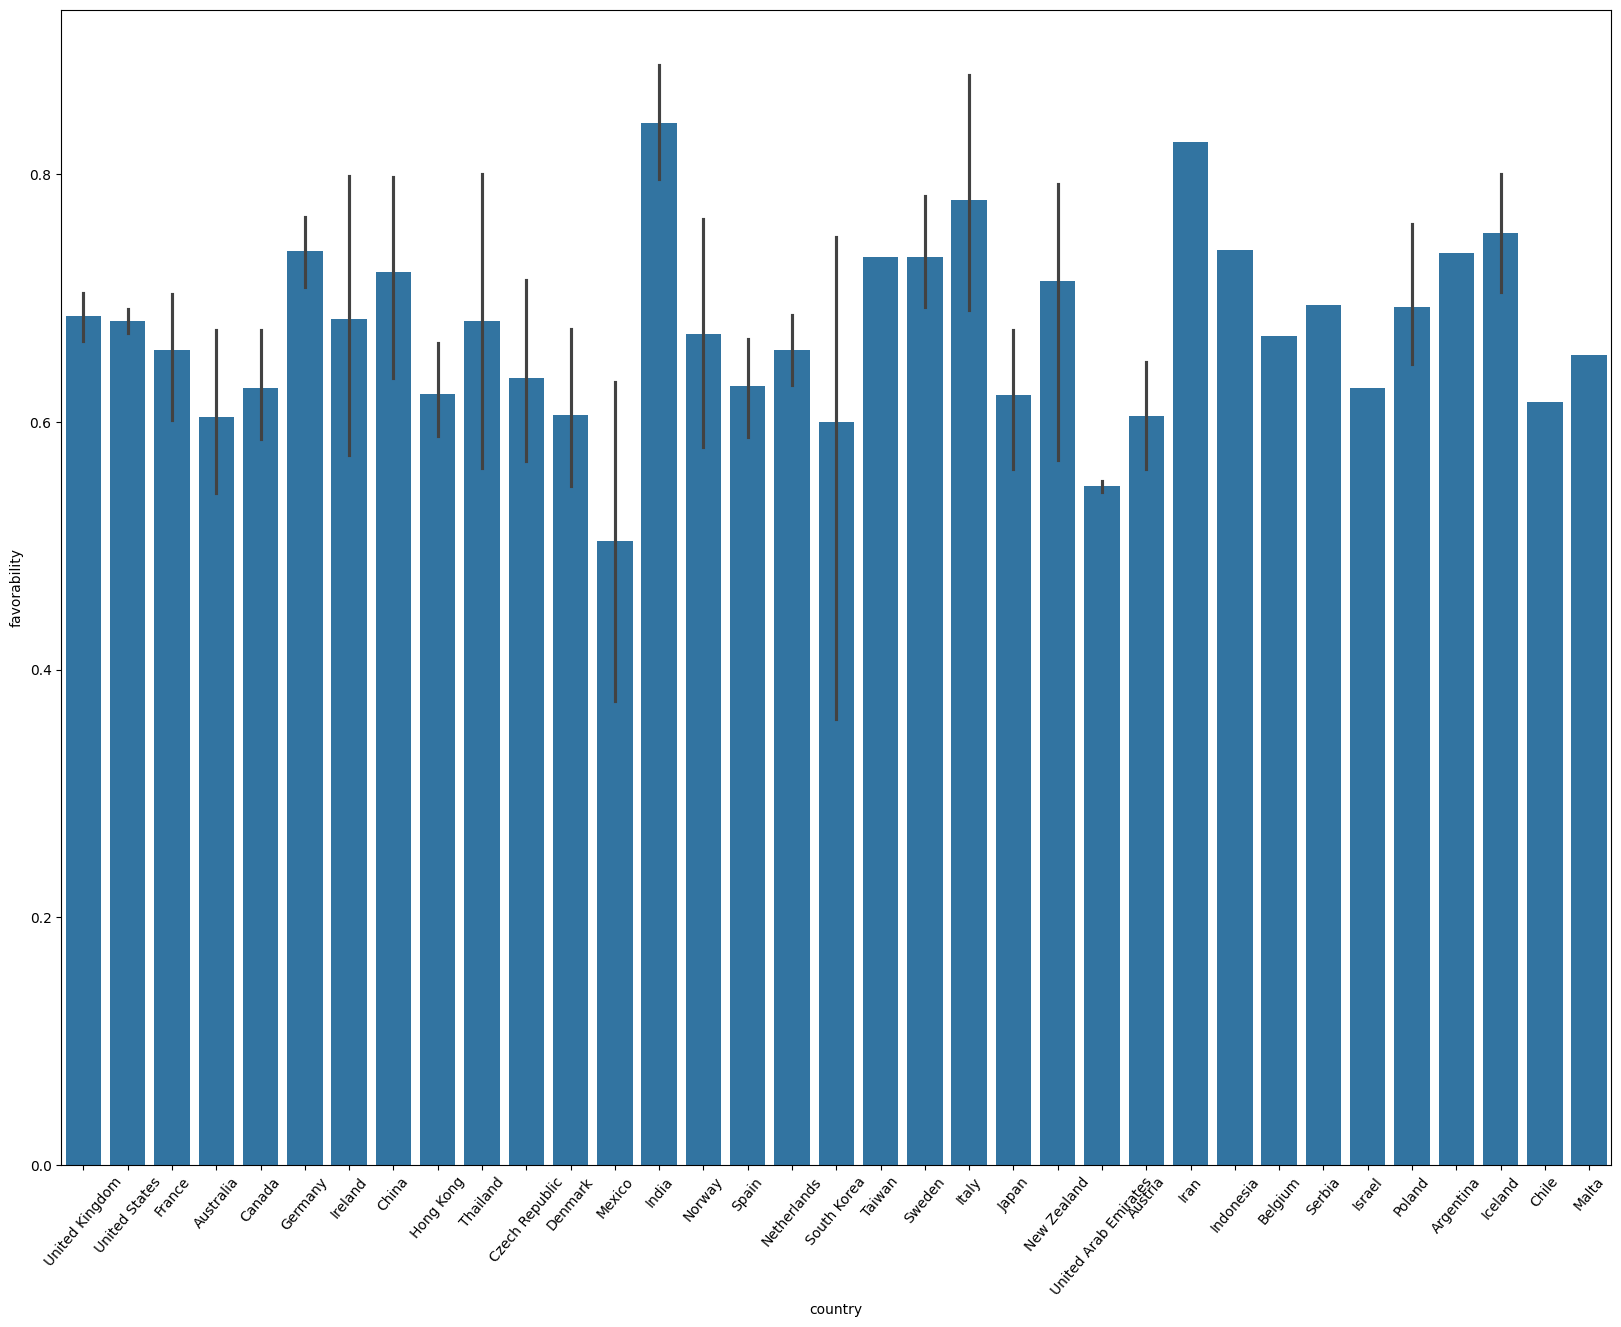

In [32]:
plt.figure(figsize=(20,15))
ax = sns.barplot(x="country", y="favorability", data=df)
plt.xticks(rotation= 50);

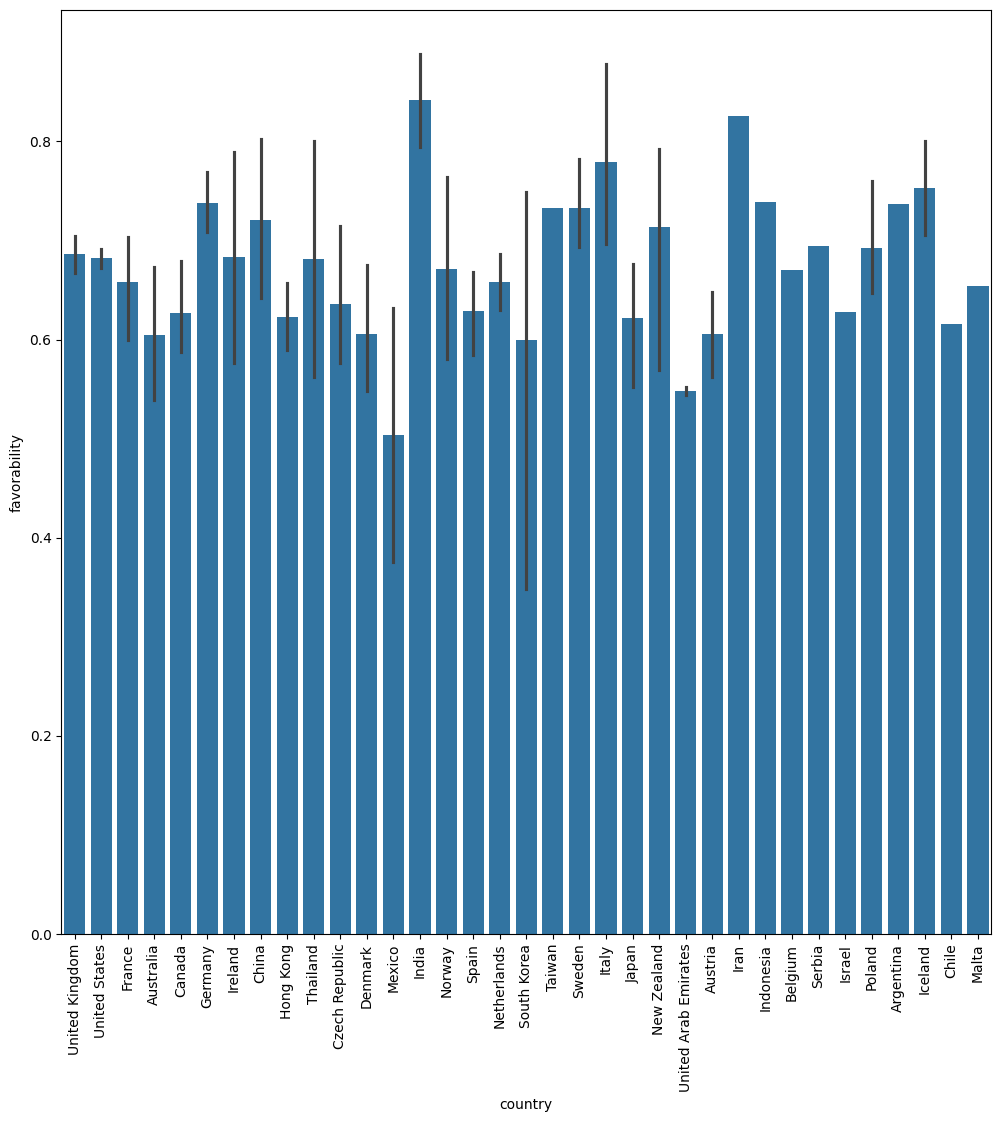

In [34]:
ax = plt.figure(figsize=(12,12))
plt.xticks(rotation=90)
ax = sns.barplot(x="country", y="favorability", data=df)

In [36]:
non_numeric_columns = df.select_dtypes(exclude=['number']).columns


In [37]:
df_numeric = df.drop(columns=non_numeric_columns)


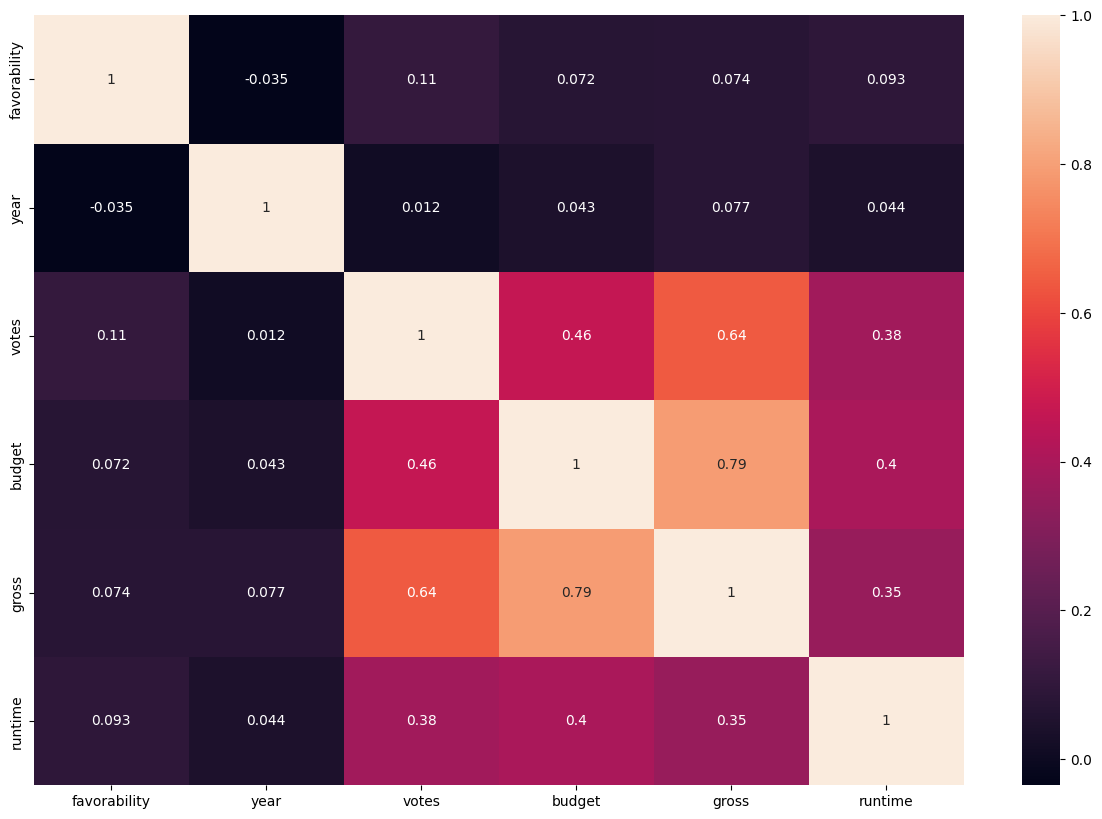

In [38]:
plt.figure(figsize=(15,10))
sns.heatmap(df_numeric.corr(), annot=True)
plt.show()

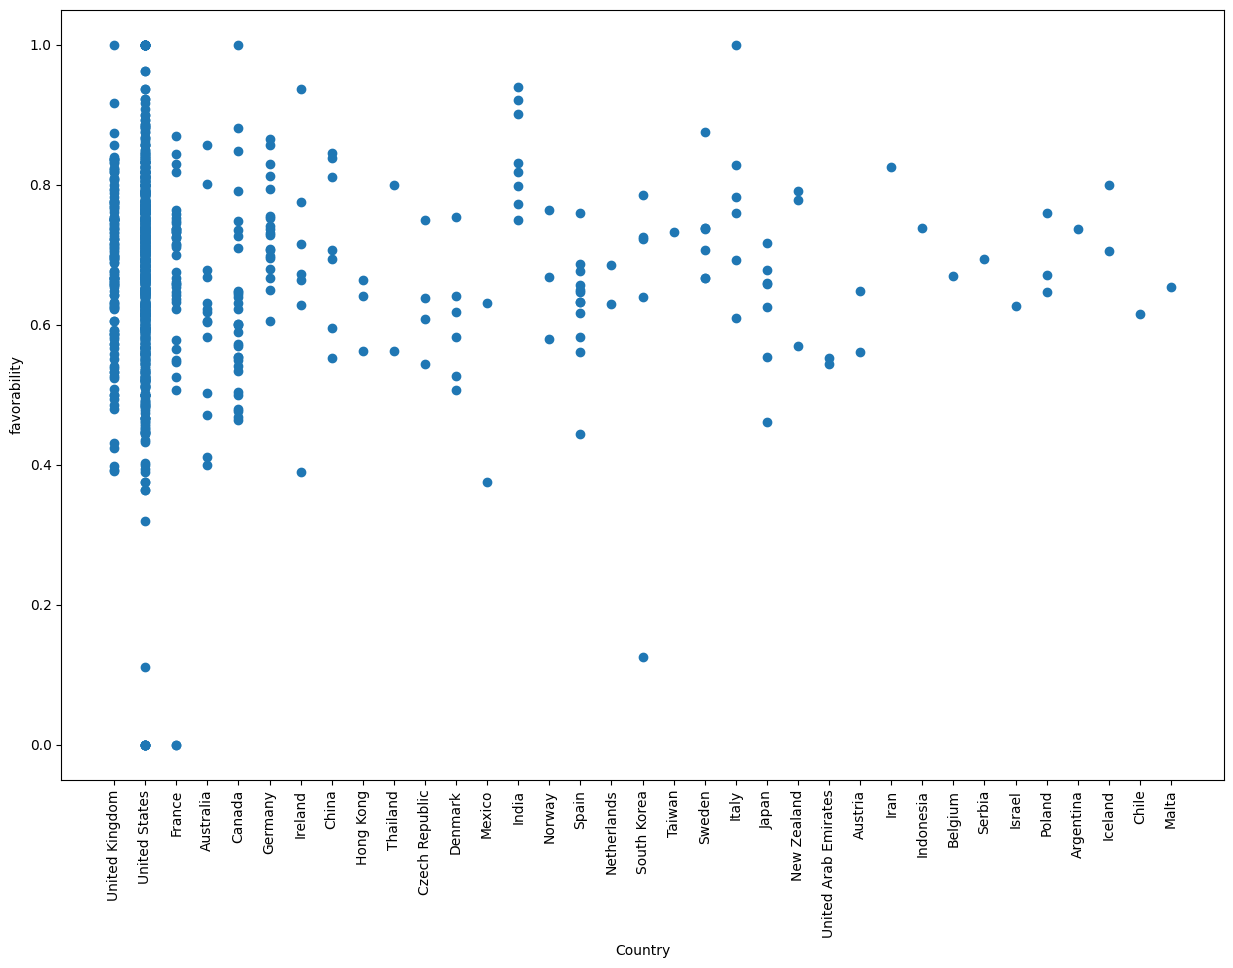

In [39]:
plt.figure(figsize=(15,10))
plt.scatter('country',"favorability" , data=df)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('favorability')
plt.show()